In [1]:
from Modelos import *

gerador = Gerador(min_layers=2, max_layers=6)
modelo = gerador.construir_modelo()
gerador.compilar_modelo()

encoder = gerador.encoder
decoder = gerador.decoder

2024-10-02 15:50:54.858820: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 15:50:54.872849: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 15:50:54.876967: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 15:50:54.887127: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-02 15:50:55.788614: W tensorflow/compiler/tf2

Current shape after encoder: (4, 4, 126)
Latent dimension: 2016


I0000 00:00:1727895057.077976  150419 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727895057.112069  150419 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727895057.112241  150419 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727895057.113252  150419 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [2]:
print(encoder.summary())
print(decoder.summary())

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 391)    │        10,948 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 391)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 35)     │       123,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 35)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 498)    │       157,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 498)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 126)      │       564,858 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 126)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2016)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 856,374 (3.27 MB)

 Trainable params: 856,374 (3.27 MB)

 Non-trainable params: 0 (0.00 B)

None


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2016)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2016)           │     4,066,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 126)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 56)       │        63,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 56)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 434)      │       219,170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 434)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 398)    │     1,554,986 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 32, 32, 398)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 270)    │       967,410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 64, 64, 270)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 3)      │         7,293 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,878,691 (26.24 MB)

 Trainable params: 6,878,691 (26.24 MB)

 Non-trainable params: 0 (0.00 B)

None


In [3]:
from Preprocessamento import preprocessamento
from segmentandoDatasets import segmentando_datasets

segmentando_datasets(10000,10000,10000)

treino, validacao, teste, treino_df, validacao_df, teste_df = preprocessamento(caminho="Datasets_csv/df_PUC.csv")

DataFrame do local PUC salvo como: Datasets_csv/df_PUC.csv
DataFrame do local PUC:
                                      caminho_imagem    classe
0  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
1  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
2  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
3  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
4  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty


DataFrame do local UFPR04 salvo como: Datasets_csv/df_UFPR04.csv
DataFrame do local UFPR04:
                                      caminho_imagem    classe
0  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty
1  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty
2  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
3  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty
4  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty


DataFrame do local UFPR05 salvo como: Datasets_csv/df_UFPR05.csv


Epoch 1/30


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727895062.801904  150493 service.cc:146] XLA service 0x7737e8011770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727895062.801921  150493 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660, Compute Capability 7.5
2024-10-02 15:51:02.867016: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-02 15:51:03.147633: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
E0000 

  2/188 ━━━━━━━━━━━━━━━━━━━━ 17s 95ms/step - loss: 0.0431 

I0000 00:00:1727895074.557349  150493 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


128/188 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0274

E0000 00:00:1727895088.169547  150495 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1727895088.299018  150495 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1727895088.430927  150495 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1727895088.576442  150495 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1727895088.708618  150495 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 0.0237

2024-10-02 15:51:58.188193: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.80GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-02 15:52:04.267682: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.60GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


188/188 ━━━━━━━━━━━━━━━━━━━━ 66s 268ms/step - loss: 0.0237 - val_loss: 0.0057
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - loss: 0.0061 - val_loss: 0.0045
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - loss: 0.0027 - val_loss: 0.0032
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 9/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - loss: 0.0023 - val_loss: 0.0029
Epoch 10/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 11/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 12/30
188/188 ━━━━━━━━━━━━━━━━━━

2024-10-02 16:01:02.458260: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.41GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


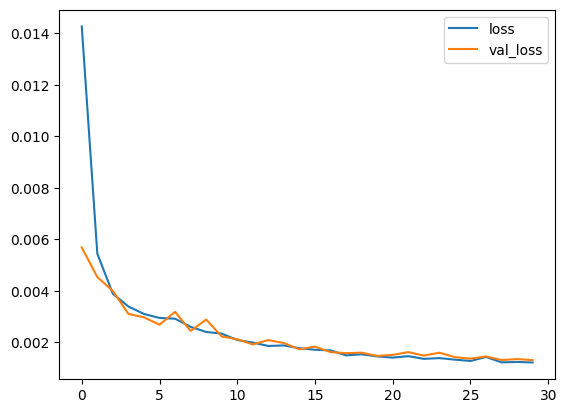

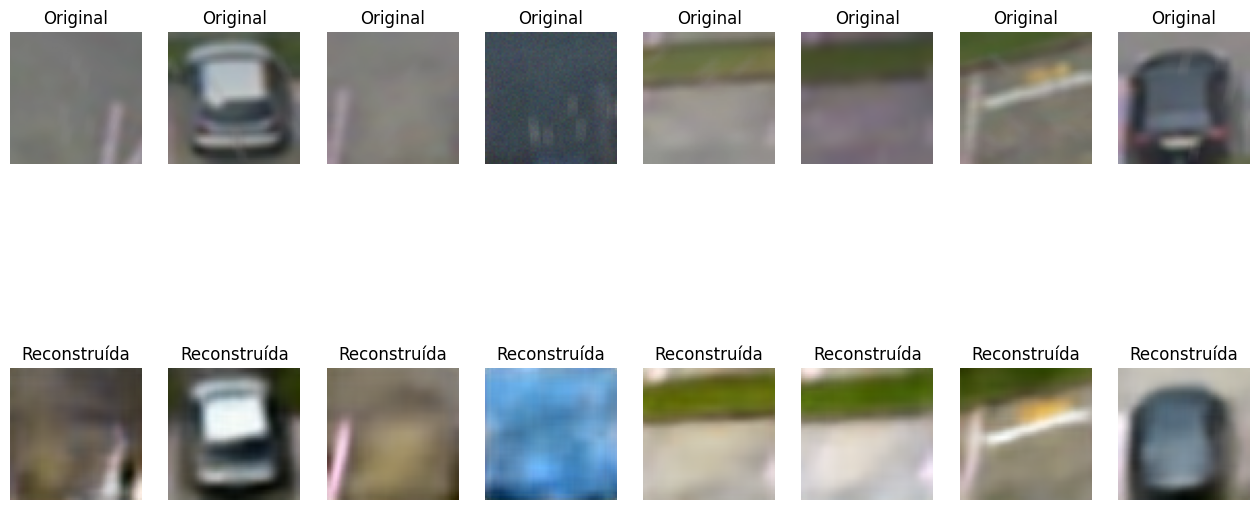

In [4]:
gerador.Dataset(treino, validacao, teste)
gerador.treinar_autoencoder(epocas=30, salvar=True)

In [5]:
classificador = GeradorClassificador(encoder=encoder, pesos="weights_finais/Autoencoders_Gerados/Autoencoder_Modelo_salvo_em__2_10_2024_15_10.weights.h5")

Pesos carregados com sucesso


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:591: UserWarning: A total of 6 objects could not be loaded. Example error message for object <Conv2D name=conv2d, built=True>:

The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(3, 3, 3, 391), Received: value.shape=(3, 3, 3, 99). Target variable: <KerasVariable shape=(3, 3, 3, 391), dtype=float32, path=conv2d/kernel>

List of objects that could not be loaded:
[<Conv2D name=conv2d, built=True>, <Conv2D name=conv2d_1, built=True>, <Conv2D name=conv2d_2, built=True>, <Conv2D name=conv2d_3, built=True>, <Dense name=dense_1, built=True>, <Dens

Found 6000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.
Epoch 1/10


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9250 - loss: 0.2831 - val_accuracy: 0.9925 - val_loss: 0.0433
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9902 - loss: 0.0359 - val_accuracy: 0.9910 - val_loss: 0.0370
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9932 - loss: 0.0310 - val_accuracy: 0.9950 - val_loss: 0.0298
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9949 - loss: 0.0219 - val_accuracy: 0.9940 - val_loss: 0.0275
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9937 - loss: 0.0237 - val_accuracy: 0.9935 - val_loss: 0.0291
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9943 - loss: 0.0268 - val_accuracy: 0.9945 - val_loss: 0.0294
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9946 - loss: 0.0188 - val_accuracy: 0.9960 - val_loss: 0.0234
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9925 - loss: 0.0306 - val_accuracy: 0.993

/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step


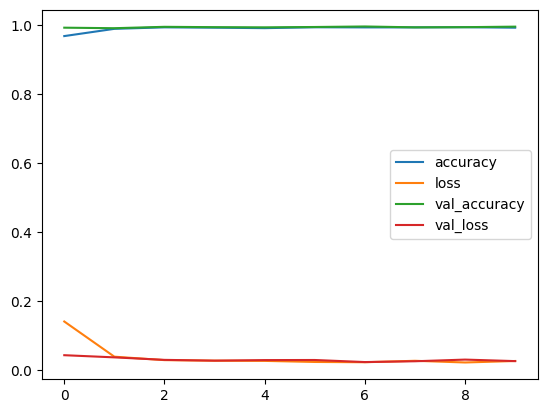

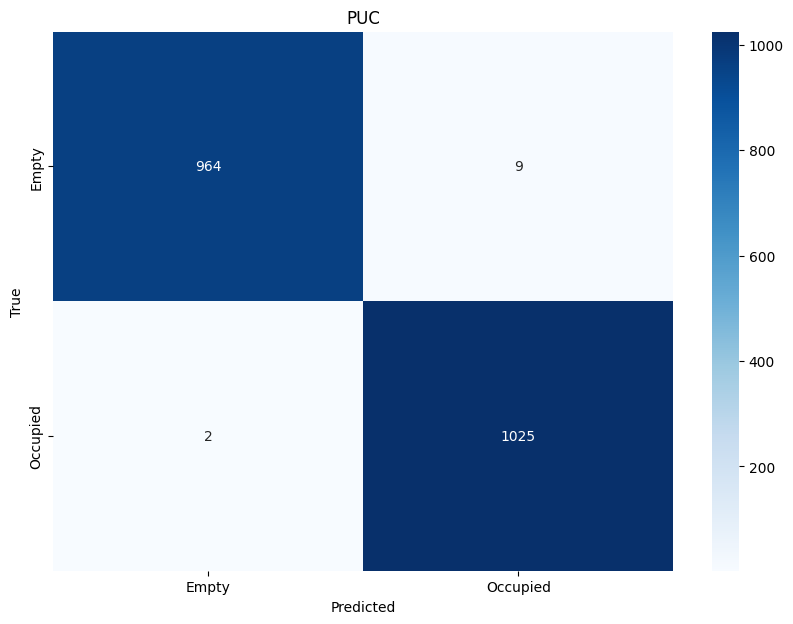

In [6]:
treino, validacao, teste, treino_df, validacao_df, teste_df = preprocessamento(caminho="Datasets_csv/df_PUC.csv", autoencoder=False)

classificador.Dataset(treino, validacao, teste)

classificador.treinamento()

classificador.predicao(teste_df)